# EDA on dataset

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 


df = pd.read_csv("dataset.csv")
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [14]:
num_movies = df.shape[0]
num_movies

1136234

In [23]:
df.describe()


,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,8.736840e+05,873684.000000,873684.000000,8.736840e+05,873684.000000,8.736840e+05,873684.000000
mean,7.190411e+05,1.968239,21.063433,7.131734e+05,50.488395,2.905464e+05,1.301974
std,3.935882e+05,3.030796,328.987282,1.708671e+07,61.057364,5.027463e+06,8.021203
min,2.000000e+00,0.000000,0.000000,-1.200000e+01,-28.000000,0.000000e+00,0.000000
25%,3.912575e+05,0.000000,0.000000,0.000000e+00,3.000000,0.000000e+00,0.600000
50%,7.172700e+05,0.000000,0.000000,0.000000e+00,28.000000,0.000000e+00,0.600000
75%,1.062945e+06,5.000000,1.000000,0.000000e+00,90.000000,0.000000e+00,0.926000
max,1.391593e+06,10.000000,34495.000000,3.000000e+09,14400.000000,1.000000e+09,2994.357000


## Remove the titles without enlglish names.

In [17]:
df = df[df['title'].apply(lambda x: bool(re.match(r'^[A-Za-z0-9\s.,!?\'"-]+$', str(x))))]
df.shape[0]

873684

In [24]:
df.describe

<bound method NDFrame.describe of               id                    title  vote_average  vote_count    status  \
0          27205                Inception         8.364       34495  Released   
1         157336             Interstellar         8.417       32571  Released   
2            155          The Dark Knight         8.512       30619  Released   
3          19995                   Avatar         7.573       29815  Released   
4          24428             The Avengers         7.710       29166  Released   
...          ...                      ...           ...         ...       ...   
1136229   732895  200 Cigarettes from Now         0.000           0  Released   
1136230   732896            Dear Aunt Noa         0.000           0  Released   
1136231   732897                 Aye, Boy         0.000           0  Released   
1136232   732898              The Turtles         0.000           0  Released   
1136233  1391127            Psycho Lovers         0.000           0  Releas

In [19]:
top_rated_movies = df[['title', 'vote_average']].sort_values(by='vote_average', ascending=False).head(10)
top_rated_movies

,title,vote_average
310493,Khoon Ki Pukaar,10.0
227450,Gangsters in the Ocean,10.0
299137,mondano,10.0
258823,Kyoei Branko,10.0
299148,Le Regard Tairraz,10.0
299153,THE TRUE RELIGION by RICK S RUTH ARTIST,10.0
258822,Bounty,10.0
299167,Cortland,10.0
299175,We're Sitting Good!,10.0
299179,Abducted on Prom Night,10.0


In [22]:
df.describe()


,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,8.736840e+05,873684.000000,873684.000000,8.736840e+05,873684.000000,8.736840e+05,873684.000000
mean,7.190411e+05,1.968239,21.063433,7.131734e+05,50.488395,2.905464e+05,1.301974
std,3.935882e+05,3.030796,328.987282,1.708671e+07,61.057364,5.027463e+06,8.021203
min,2.000000e+00,0.000000,0.000000,-1.200000e+01,-28.000000,0.000000e+00,0.000000
25%,3.912575e+05,0.000000,0.000000,0.000000e+00,3.000000,0.000000e+00,0.600000
50%,7.172700e+05,0.000000,0.000000,0.000000e+00,28.000000,0.000000e+00,0.600000
75%,1.062945e+06,5.000000,1.000000,0.000000e+00,90.000000,0.000000e+00,0.926000
max,1.391593e+06,10.000000,34495.000000,3.000000e+09,14400.000000,1.000000e+09,2994.357000


In [26]:
extreme_runtime_movies = df[df['runtime'].between(0, 30) | (df['runtime'] > 180)]
extreme_runtime_movies

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
17,597,Titanic,7.900,23637,Released,1997-11-18,2264162353,194,False,/rzdPqYx7Um4FUZeD8wpXqjAUcEm.jpg,...,Titanic,101-year-old Rose DeWitt Bukater tells the sto...,102.348,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,Nothing on Earth could come between them.,"Drama, Romance","Paramount, 20th Century Fox, Lightstorm Entert...",United States of America,"English, French, German, Swedish, Italian, Rus...","epic, ship, drowning, panic, shipwreck, evacua..."
93,497,The Green Mile,8.507,15937,Released,1999-12-10,286801374,189,False,/l6hQWH9eDksNJNiXWYRkWqikOdu.jpg,...,The Green Mile,A supernatural tale set on death row in a Sout...,83.739,/8VG8fDNiy50H4FedGwdSVUPoaJe.jpg,Miracles do happen.,"Fantasy, Drama, Crime","Castle Rock Entertainment, Darkwoods Productio...",United States of America,"French, English","mentally disabled, based on novel or book, sou..."
119,424,Schindler's List,8.573,14594,Released,1993-12-15,321365567,195,False,/zb6fM1CX41D9rF9hdgclu0peUmy.jpg,...,Schindler's List,The true story of how businessman Oskar Schind...,65.084,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,"Whoever saves one life, saves the world entire.","Drama, History, War",Amblin Entertainment,United States of America,"German, Polish, Hebrew, English","factory, hero, based on novel or book, nazi, c..."
149,273248,The Hateful Eight,7.746,13291,Released,2015-12-25,155760117,188,False,/7gfDVfaw0VaIkUGiEH13o3TIC7A.jpg,...,The Hateful Eight,Bounty hunters seek shelter from a raging bliz...,32.119,/jIywvdPjia2t3eKYbjVTcwBQlG8.jpg,No one comes up here without a damn good reason.,"Drama, Mystery, Western","The Weinstein Company, Double Feature Films, F...",United States of America,"Spanish, English","bounty hunter, wyoming, usa, narration, mounta..."
215,240,The Godfather Part II,8.591,11293,Released,1974-12-20,102600000,202,False,/kGzFbGhp99zva6oZODW5atUtnqi.jpg,...,The Godfather Part II,In the continuing saga of the Corleone crime f...,64.753,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,"I don't feel I have to wipe everybody out, Tom...","Drama, Crime","Paramount, The Coppola Company",United States of America,"English, Italian, Latin, Spanish","italian american, cuba, italy, gangster, prais..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136228,732894,Good Morning,0.000,0,Released,2020-04-05,0,13,False,NaN,...,Good Morning,"Buzz, buzz. A text comes through and Griff wak...",0.600,/3R4Tg4MpgPYtJzrm4tls33kgQTA.jpg,NaN,NaN,NaN,NaN,NaN,NaN
1136230,732896,Dear Aunt Noa,0.000,0,Released,NaN,0,11,False,NaN,...,Dear Aunt Noa,A transgender environmentalist from LA and a s...,0.600,/3apMpTgBZhKa9PfikUJjL4hon2I.jpg,NaN,NaN,NaN,NaN,NaN,NaN
1136231,732897,"Aye, Boy",0.000,0,Released,2020-09-17,0,19,False,NaN,...,"Aye, Boy",In this coming-of-age story inspired by true e...,0.600,/tFxO95u5pENsCXpWhBeViWtAtNk.jpg,NaN,NaN,NaN,NaN,NaN,NaN
1136232,732898,The Turtles,0.000,0,Released,2021-12-04,0,15,False,NaN,...,The Turtles,When the introverted Emma meets the bubbly Jea...,0.600,/mjJr5WYKLSArB8N7KY8iiIKctFt.jpg,NaN,Comedy,NaN,United Kingdom,English,NaN


In [27]:
most_popular_movies = df[['title', 'popularity']].sort_values(by='popularity', ascending=False).head(10)
most_popular_movies

,title,popularity
3871,Blue Beetle,2994.357
5052,Gran Turismo,2680.593
51803,A Female Boss with Big Tits and Her Cherry Boy...,2020.286
7921,The Nun II,1692.778
9968,Retribution,1547.220
4014,Talk to Me,1458.514
1110,Fast X,1175.267
6397,Sound of Freedom,1111.036
825,Barbie,1069.340
1799,Elemental,1008.942


In [30]:
language_distribution = df['spoken_languages'].value_counts()
language_distribution

spoken_languages
English                                        193292
Spanish                                         28412
French                                          26059
No Language                                     25284
Japanese                                        25058
                                                ...  
Hebrew, Arabic, German, English, French             1
French, Ukrainian, English                          1
Portuguese, Spanish, Italian, English               1
Bengali, Mandarin, Hindi                            1
Mandarin, English, French, German, Japanese         1
Name: count, Length: 6428, dtype: int64

In [31]:
correlation_matrix = df[['vote_average', 'revenue', 'runtime', 'popularity']].corr()
correlation_matrix

,vote_average,revenue,runtime,popularity
vote_average,1.000000,0.061396,0.236554,0.118480
revenue,0.061396,1.000000,0.043149,0.214458
runtime,0.236554,0.043149,1.000000,0.069725
popularity,0.118480,0.214458,0.069725,1.000000


In [32]:
high_revenue_genres = df.explode('genres').groupby('genres')['revenue'].mean().sort_values(ascending=False)
high_revenue_genres

genres
Animation, Family, Adventure, Fantasy, Comedy           1.355725e+09
Drama, Thriller, Documentary, War                       1.000000e+09
Horror, Thriller, Crime, Mystery, Action                9.570000e+08
Animation, Family, Adventure, Drama, Comedy             8.576112e+08
Family, Animation, Fantasy, Music, Comedy, Adventure    8.005260e+08
                                                            ...     
Crime, Fantasy, Romance                                 0.000000e+00
Crime, Fantasy, TV Movie                                0.000000e+00
Crime, Fantasy, Thriller                                0.000000e+00
Crime, History                                          0.000000e+00
Western, War, Thriller                                  0.000000e+00
Name: revenue, Length: 11500, dtype: float64

/var/folders/cv/57_q_p5n4cncc53s74r1mjy80000gn/T/ipykernel_85889/1048683704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='title', data=top_revenue, palette="viridis")


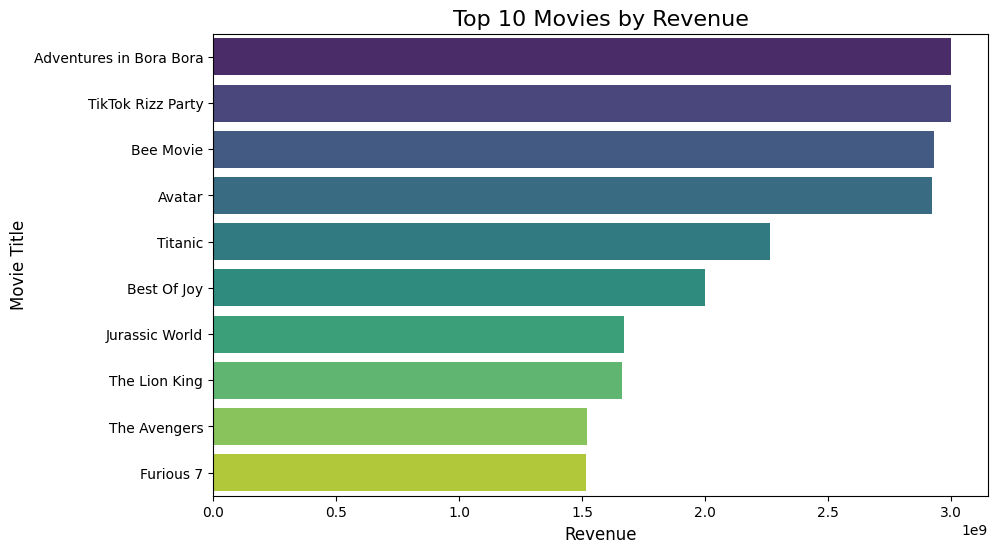

In [33]:
top_revenue = df[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='revenue', y='title', data=top_revenue, palette="viridis")
plt.title("Top 10 Movies by Revenue", fontsize=16)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Movie Title", fontsize=12)
plt.show()


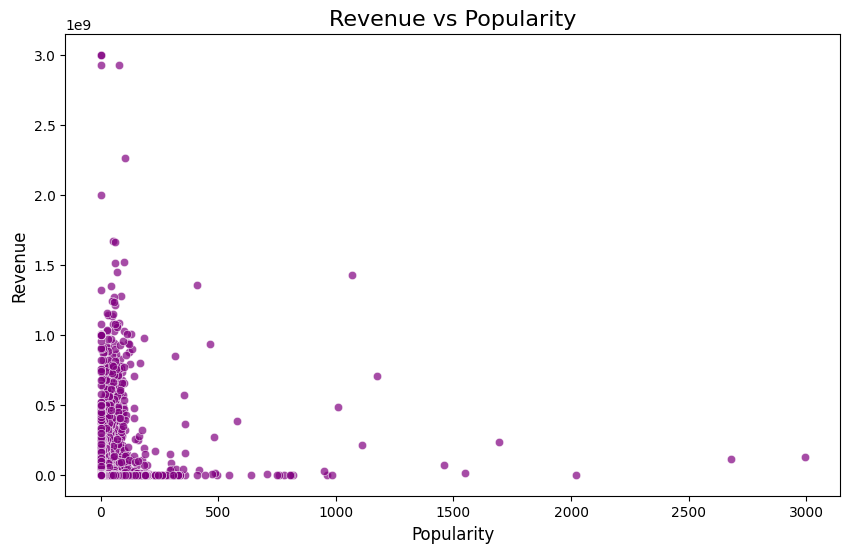

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='revenue', data=df, alpha=0.7, color='purple')
plt.title("Revenue vs Popularity", fontsize=16)
plt.xlabel("Popularity", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.show()
